### scikit-learnのmake_classification関数を使いこなせるように練習してみる
参考:http://overlap.hatenablog.jp/entry/2015/10/08/022246

```
sklearn.datasets.make_classification(
    n_samples=100,n_features=20, n_informative=2, n_redundant=2,
    n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None,
    flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0,
    shuffle=True, random_state=None)
```

<table>
    <tbody><tr>
    <th>パラメータ名</th>
    <th>説明</th>
    </tr>
    <tr>
    <td>n_samples</td>
    <td>生成するサンプルの数。</td>
    </tr>
    <tr>
    <td>n_features</td>
    <td>生成する特徴量の数。</td>
    </tr>
    <tr>
    <td>n_informative</td>
    <td>目的変数のラベルと相関が強い特徴量(Informative fearture）の数。</td>
    </tr>
    <tr>
    <td>n_redundant</td>
    <td>Informative featureの線形結合から作られる特徴量(Redundant fearture）の数。</td>
    </tr>
    <tr>
    <td>n_repeated</td>
    <td>Infomative、Redundant featureのコピーからなる特長量の数(Repeated feature)。</td>
    </tr>
    <tr>
    <td>n_classes</td>
    <td>分類するクラス数。2なら2値分類問題、3以上なら多値分類問題のデータが作られる。</td>
    </tr>
    <tr>
    <td>n_clusters_per_class</td>
    <td>1クラスあたりの<a class="keyword" href="http://d.hatena.ne.jp/keyword/%A5%AF%A5%E9%A5%B9%A5%BF">クラスタ</a>数。後述する生成<a class="keyword" href="http://d.hatena.ne.jp/keyword/%A5%A2%A5%EB%A5%B4%A5%EA%A5%BA%A5%E0">アルゴリズム</a>を参照。</td>
    </tr>
    <tr>
    <td>weights</td>
    <td>クラスの比率。不均衡データを作りたい場合に指定する。例えば、2値分類問題の場合、Noneとすると0と1が50%ずつだが、[0.9, 0.1] と与えると0が90%、1が10%になる。</td>
    </tr>
    <tr>
    <td>flip_y</td>
    <td>クラスのフリップ率。例えば0.01とすると各クラスの1%の符号がランダムに変更される。</td>
    </tr>
    <tr>
    <td>class_sep</td>
    <td>生成<a class="keyword" href="http://d.hatena.ne.jp/keyword/%A5%A2%A5%EB%A5%B4%A5%EA%A5%BA%A5%E0">アルゴリズム</a>に関係するパラメータ。後述する生成<a class="keyword" href="http://d.hatena.ne.jp/keyword/%A5%A2%A5%EB%A5%B4%A5%EA%A5%BA%A5%E0">アルゴリズム</a>における超立法体の頂点の距離。</td>
    </tr>
    <tr>
    <td>hypercube</td>
    <td>生成<a class="keyword" href="http://d.hatena.ne.jp/keyword/%A5%A2%A5%EB%A5%B4%A5%EA%A5%BA%A5%E0">アルゴリズム</a>に関係するパラメータ。Trueにすると後述する生成<a class="keyword" href="http://d.hatena.ne.jp/keyword/%A5%A2%A5%EB%A5%B4%A5%EA%A5%BA%A5%E0">アルゴリズム</a>において、超立方体の頂点に<a class="keyword" href="http://d.hatena.ne.jp/keyword/%A5%AF%A5%E9%A5%B9%A5%BF">クラスタ</a>を配置する。</td>
    </tr>
    <tr>
    <td>shift</td>
    <td>全ての特徴量にshiftを加算する。Noneが指定された場合、[-class_sep, class_sep]の一様乱数を加算する。</td>
    </tr>
    <tr>
    <td>scale</td>
    <td>全ての特徴量にscaleを乗算する。Noneが指定された場合、 [1, 100]の一様乱数を乗算する。（scaleはshift後に行われる）</td>
    </tr>
    <tr>
    <td>shuffle</td>
    <td>Trueにすると行と列をシャッフルする。</td>
    </tr>
    <tr>
    <td>random_state</td>
    <td>乱数を制御するパラメータ。Noneにすると毎回違うデータが生成されが、整数をシードとして渡すと毎回同じデータが生成される。乱数オブジェクトを渡すことも可能。</td>
    </tr>
</tbody></table>

基本的には
`n_samples`と`n_features`,`n_informative`,`n_classes`が重要だろう。

その他にも、`n_clusters_per_class`でクラス間をバラけさせたりできるし、`weights`で不均衡データを作成することもできる。

またデータ生成方法なんとmadelonと同じらしい！！！
    

### 実際に使ってみる

In [1]:
from sklearn.datasets import make_classification

In [2]:
X,y = make_classification(n_samples=1000, 
                          n_features=20, #最終的な次元数
                          n_informative=5, 
                          n_redundant=2,
                          n_classes=2, 
                          n_clusters_per_class=10, 
                          random_state=42)
print(X.shape,y.shape)

(1000, 20) (1000,)


### n_cluster_per_classの振る舞いを見てみる

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(100, 2) (100,)


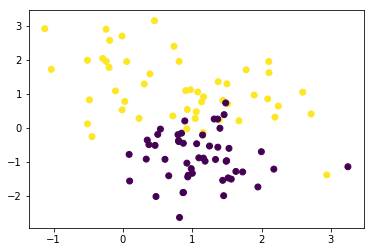

In [4]:
#何回か実行するとわかるが、randomstateを設定しないと実行するたびに結果が変わるが、しかし、たまに棒状に変なところに点が存在するになる現象が確認される。
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=None, n_clusters_per_class=1)
print(X.shape, y.shape)
plt.scatter(X[:,0],X[:,1],c=y);

(100, 2) (100,)


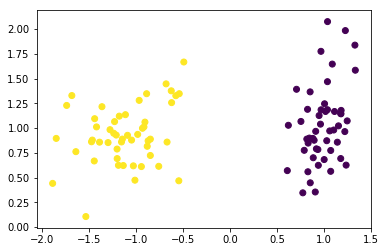

In [5]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
print(X.shape, y.shape)
plt.scatter(X[:,0],X[:,1],c=y);

(100, 2) (100,)


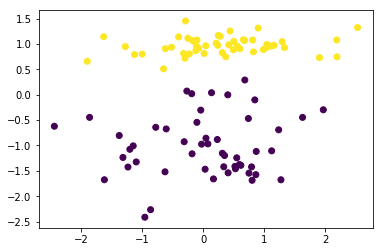

In [6]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=1, #1にしてみた
                           random_state=1, n_clusters_per_class=1)
print(X.shape, y.shape)
plt.scatter(X[:,0],X[:,1],c=y);

(100, 2) (100,)


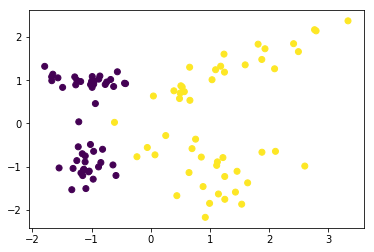

In [7]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, 
                           random_state=2014, n_clusters_per_class=2) #なるほど確かに二クラスタになった
print(X.shape, y.shape)
plt.scatter(X[:,0],X[:,1],c=y);

(100, 2) (100,)


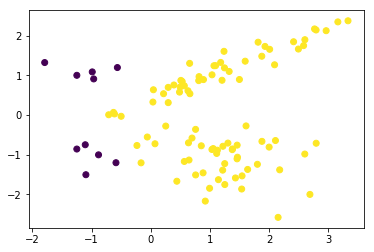

In [8]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, 
                           random_state=2014, n_clusters_per_class=2, weights=[0.1,0.9]) #クラスインバランス化
print(X.shape, y.shape)
plt.scatter(X[:,0],X[:,1],c=y);